# Building Regression Model with Keras

In this project, I will build a regression model using the deep learning Keras library, and then I will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

#### Importing Libraries

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense


### Loading the dataset

In [39]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Let's check how many data points we have.

In [40]:
concrete_data.shape

(1030, 9)

Let's check the dataset for any missing values.

In [41]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [42]:

concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors and target

In [43]:
predictor = concrete_data.drop(columns = ['Strength'])
target = concrete_data['Strength']
n_cols = predictor.shape[1]

Let's do a quick sanity check of the predictors and the target dataframes.

In [44]:
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [45]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Section: A
Building the baseline Neural Network Model




In [46]:
def regression_model():
  #creating the model
  model = Sequential()
  #first hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

Splitting the data into a training and test sets by holding 30% of the data for testing

In [47]:
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=42)

## Train and Test the Network

Let's call the function now to create our model.
Next, we will train the model for 50 epochs

In [49]:
# Build model
model = regression_model()

# Fit model
model.fit(predictor, target, epochs=50, verbose=2)

Epoch 1/50
33/33 - 1s - loss: 9182.3691 - 511ms/epoch - 15ms/step
Epoch 2/50
33/33 - 0s - loss: 3331.4412 - 48ms/epoch - 1ms/step
Epoch 3/50
33/33 - 0s - loss: 2601.5029 - 62ms/epoch - 2ms/step
Epoch 4/50
33/33 - 0s - loss: 2107.9092 - 55ms/epoch - 2ms/step
Epoch 5/50
33/33 - 0s - loss: 1746.5182 - 53ms/epoch - 2ms/step
Epoch 6/50
33/33 - 0s - loss: 1473.5953 - 54ms/epoch - 2ms/step
Epoch 7/50
33/33 - 0s - loss: 1258.3121 - 50ms/epoch - 2ms/step
Epoch 8/50
33/33 - 0s - loss: 1099.5050 - 65ms/epoch - 2ms/step
Epoch 9/50
33/33 - 0s - loss: 968.1709 - 54ms/epoch - 2ms/step
Epoch 10/50
33/33 - 0s - loss: 871.0778 - 56ms/epoch - 2ms/step
Epoch 11/50
33/33 - 0s - loss: 785.4714 - 55ms/epoch - 2ms/step
Epoch 12/50
33/33 - 0s - loss: 719.3383 - 48ms/epoch - 1ms/step
Epoch 13/50
33/33 - 0s - loss: 668.0103 - 50ms/epoch - 2ms/step
Epoch 14/50
33/33 - 0s - loss: 615.7926 - 53ms/epoch - 2ms/step
Epoch 15/50
33/33 - 0s - loss: 572.2094 - 47ms/epoch - 1ms/step
Epoch 16/50
33/33 - 0s - loss: 534.9213

We need to evaluate the model on test data.

In [50]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

10/10 [==============================] - 0s 2ms/step


138.22032165527344

In [51]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

138.2203233206089 0.0


List of 50 mean squared errors with report of mean and the standard deviation of the mean squared errors

In [53]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print(str(i+1)+"  MSE----> "+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")


1  MSE----> : 93.4520263671875
10/10 [==============================] - 0s 1ms/step
2  MSE----> : 121.61591339111328
10/10 [==============================] - 0s 1ms/step
3  MSE----> : 114.5422592163086
10/10 [==============================] - 0s 666us/step
4  MSE----> : 121.87704467773438
10/10 [==============================] - 0s 2ms/step
5  MSE----> : 122.00952911376953
10/10 [==============================] - 0s 2ms/step
6  MSE----> : 108.69194030761719
10/10 [==============================] - 0s 1ms/step
7  MSE----> : 130.18064880371094
10/10 [==============================] - 0s 1ms/step
8  MSE----> : 75.46430206298828
10/10 [==============================] - 0s 2ms/step
9  MSE----> : 67.83309936523438
10/10 [==============================] - 0s 2ms/step
10  MSE----> : 53.01186752319336
10/10 [==============================] - 0s 2ms/step
11  MSE----> : 48.281307220458984
10/10 [==============================] - 0s 1ms/step
12  MSE----> : 46.318214416503906
10/10 [===============

In [54]:
mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
print("Mean of MSE: "+str(mean))
print("Standard Deviation of MSE: "+str(standard_deviation))

Mean of MSE: 59.71536369871615
Standard Deviation of MSE: 23.757619046937943


## Section: B
Normalizing the predictor columns

In [55]:
predictor = (predictor-predictor.mean())/predictor.std()
predictor.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [57]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print(str(i+1)+"  MSE----> "+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")


1  MSE----> : 79.52852630615234
10/10 [==============================] - 0s 1ms/step
2  MSE----> : 76.4710464477539
10/10 [==============================] - 0s 1ms/step
3  MSE----> : 48.412837982177734
10/10 [==============================] - 0s 1ms/step
4  MSE----> : 48.42582321166992
10/10 [==============================] - 0s 1ms/step
5  MSE----> : 47.10138702392578
10/10 [==============================] - 0s 446us/step
6  MSE----> : 49.6601676940918
10/10 [==============================] - 0s 2ms/step
7  MSE----> : 52.81272888183594
10/10 [==============================] - 0s 2ms/step
8  MSE----> : 39.88995361328125
10/10 [==============================] - 0s 2ms/step
9  MSE----> : 42.17515563964844
10/10 [==============================] - 0s 2ms/step
10  MSE----> : 44.64072036743164
10/10 [==============================] - 0s 2ms/step
11  MSE----> : 40.66503143310547
10/10 [==============================] - 0s 1ms/step
12  MSE----> : 40.13742446899414
10/10 [======================

In [58]:
mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
print("Mean of MSE: "+str(mean))
print("Standard Deviation of MSE: "+str(standard_deviation))

Mean of MSE: 41.39921770945478
Standard Deviation of MSE: 8.737825521367125


The mean MSE decreased and the standard deviation for MSEs also decreased. (Compared to A)

## Section: C
Setting the epoch count to 100 for training

In [59]:
total_mean_squared_errors = 50
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print(str(i+1)+"  MSE----> "+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")


1  MSE----> : 38.066932678222656
10/10 [==============================] - 0s 1ms/step
2  MSE----> : 40.48167037963867
10/10 [==============================] - 0s 2ms/step
3  MSE----> : 32.090457916259766
10/10 [==============================] - 0s 1ms/step
4  MSE----> : 36.46985626220703
10/10 [==============================] - 0s 1ms/step
5  MSE----> : 35.02134704589844
10/10 [==============================] - 0s 1ms/step
6  MSE----> : 36.87360763549805
10/10 [==============================] - 0s 1ms/step
7  MSE----> : 41.59101486206055
10/10 [==============================] - 0s 1ms/step
8  MSE----> : 34.88772201538086
10/10 [==============================] - 0s 751us/step
9  MSE----> : 34.74728012084961
10/10 [==============================] - 0s 1ms/step
10  MSE----> : 35.57420349121094
10/10 [==============================] - 0s 2ms/step
11  MSE----> : 34.30188751220703
10/10 [==============================] - 0s 1ms/step
12  MSE----> : 32.64226531982422
10/10 [===================

In [60]:
mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
print("Mean of MSE: "+str(mean))
print("Standard Deviation of MSE: "+str(standard_deviation))

Mean of MSE: 35.043170580454856
Standard Deviation of MSE: 2.9818785004348154


The mean MSE decreased and the standard deviation for MSEs also decreased. (Compared to B)

## Section: D
Neural Network with three Hidden layers, each of 10 nodes and ReLU activation Function

In [62]:
def regression_model():
  #creating the model
  model = Sequential()
  #first hidden layer
  model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
  #second hidden layer
  model.add(Dense(10, activation = 'relu'))
  #third hidden layer
  model.add(Dense(10, activation = 'relu'))
  #output layer
  model.add(Dense(1))
  #compiling the model
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [63]:
model = regression_model()

In [64]:
total_mean_squared_errors = 50
epochs = 100
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print(str(i+1)+"  MSE----> "+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

print('\n')
print("Mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors with normalized data. \n Total number of epochs for each training is: " +str(epochs) + "\n")

1  MSE----> : 108.52684020996094
10/10 [==============================] - 0s 2ms/step
2  MSE----> : 122.0113525390625
10/10 [==============================] - 0s 1ms/step
3  MSE----> : 77.81664276123047
10/10 [==============================] - 0s 2ms/step
4  MSE----> : 49.43354797363281
10/10 [==============================] - 0s 1ms/step
5  MSE----> : 42.046810150146484
10/10 [==============================] - 0s 2ms/step
6  MSE----> : 40.058616638183594
10/10 [==============================] - 0s 1ms/step
7  MSE----> : 43.13424301147461
10/10 [==============================] - 0s 1ms/step
8  MSE----> : 34.60529708862305
10/10 [==============================] - 0s 3ms/step
9  MSE----> : 37.999759674072266
10/10 [==============================] - 0s 2ms/step
10  MSE----> : 35.698116302490234
10/10 [==============================] - 0s 2ms/step
11  MSE----> : 32.301570892333984
10/10 [==============================] - 0s 1ms/step
12  MSE----> : 27.91820526123047
10/10 [=================

In [65]:
mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)
print("Mean of MSE: "+str(mean))
print("Standard Deviation of MSE: "+str(standard_deviation))

Mean of MSE: 32.37135933885061
Standard Deviation of MSE: 19.459372058911462


The mean MSE decreased and the standard deviation for MSEs also decreased. (Compared to B)

## Comparing Mean Squared Error in all the 4 sections

Text(0, 0.5, 'Mean Squared Error')

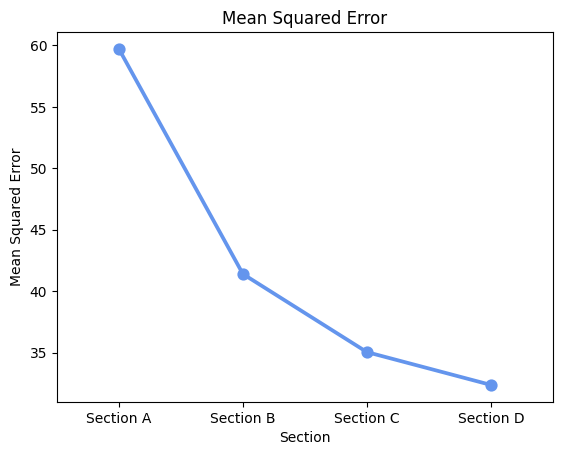

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x = ['Section A', 'Section B', 'Section C', 'Section D'], y = [59.71536369871615,41.39921770945478,35.043170580454856,32.37135933885061], color = '#6495ed').set_title('Mean Squared Error')
plt.xlabel('Section')
plt.ylabel('Mean Squared Error')